# Plotting

Contents
* [ANATOMY OF A MATPLOTLIB FIGURE](#anatomy_of_a_figure)
* [UNDERSTAND HOW `plt.subplots()` WORKS AND HOW TO USE IT](#understanding_pltsubplots)

In [1]:
# load libraries
from IPython.display import Image
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns

# paths
path_data = Path.cwd() / 'data'

# datasets
# created by statistician Frank Anscombe to show importance of statistical graphs
anscombe = sns.load_dataset('anscombe')

In [ ]:
import itertools

import numpy as np
import pandas as pd

import random
from scipy import stats

from sklearn import linear_model
import statsmodels.api as sm
import statsmodels.formula.api as smf


# set figure size
plt.rcParams["figure.figsize"] = (5,3)

tips = sns.load_dataset('tips')


<a id='anatomy_of_a_figure'></a>
## ANATOMY OF A MATPLOTLIB FIGURE

**Purpose: understand how matplotlib defines all of the parts of a figure**

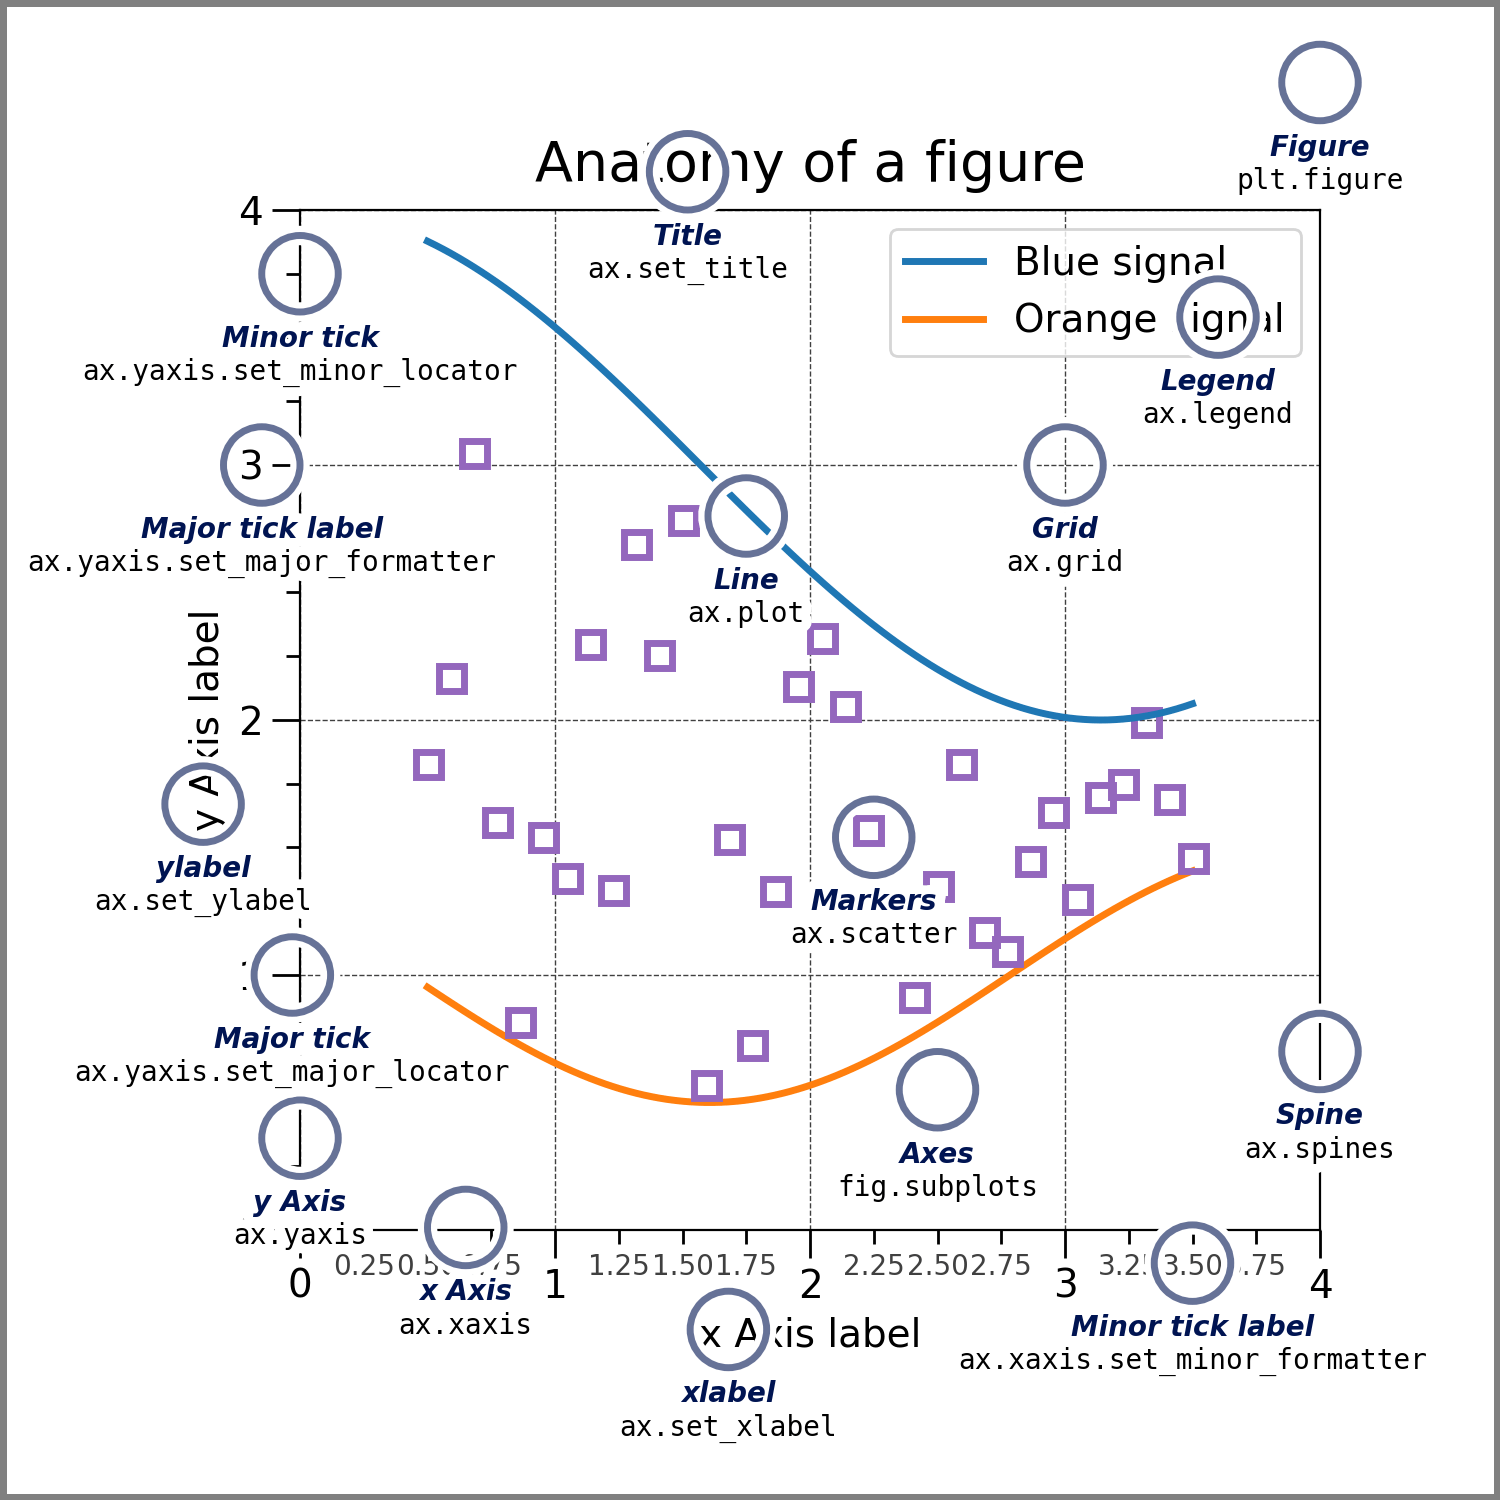

In [4]:
# source: https://matplotlib.org/stable/users/explain/quick_start.html#parts-of-a-figure
display(Image(path_data / 'parts_of_figure.png', width=500))

* `Figure` : object which contains EVERY PART of the figure
* `Axes` : object(s) where data is plotted (user specifies number of `Axes`)
    * Term is interchangeable with subplots
* `Axis` : objects that contain properites of x and y axis
* `Artist` : basically everything that is visible (includes `Figure`, `Axes`, and `Axis`)
    * When the `Figure` is rendered, all the `Artists` are drawn to the canvas
    * Most `Artists` tied to single `Axes`, can not be shared by multiple `Axes` or moved from one to another

***
<a id='understanding_pltsubplots'></a>

## UNDERSTAND HOW `plt.subplots()` WORKS AND HOW TO USE IT

**Purpose: understand how `plt.subplots()` works and how to use it, since it is one of the best ways to plot figures** 

[Reference: towardsdatascience blog](https://towardsdatascience.com/clearing-the-confusion-once-and-for-all-fig-ax-plt-subplots-b122bb7783ca)

Start by just running the most basic version of the code

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

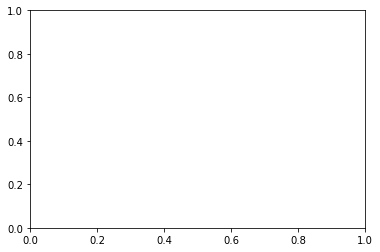

In [7]:
plt.subplots()

`plt.subplots()` returns two things: a blank plot and a tuple of 2 values
* First value in tuple holds the `Figure` object (class 'matplotlib.figure.Figure')
* Second value holds the `Axes` object (class 'matplotlib.axes._axes.Axes')

Convention is to unpack the tuple into `fig` and `ax` varibles : `fig, ax = plt.subplots()`

Unpack the tuple and plot part of anscombe dataset

<AxesSubplot:xlabel='x', ylabel='y'>

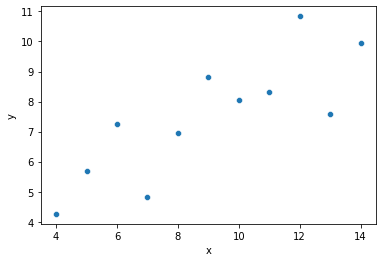

In [13]:
# unpack tuple into fig and ax variables
fig, ax = plt.subplots()

# plot data
sns.scatterplot(
    data=anscombe.loc[anscombe['dataset']=='I'], 
    x='x', 
    y='y')

Notice how the variables `fig` and `ax` were not used after assignment. Seaborn automatically plots on the current `Figure` and `Axes` if no arguments are given. Later on, examples will show how `fig` and `ax` can be passed as arguments

One of the main advantages of using `plt.subplots()` is the ability to create multiple subplots (or axes) in a single figure, for example :

The axs type : <class 'numpy.ndarray'>


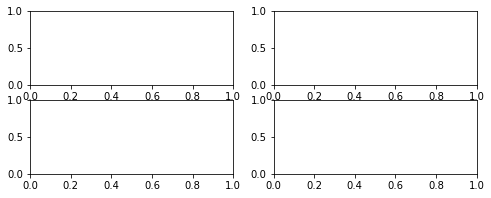

In [18]:
# pass parameters into subplots to control the output
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8,3))

# print the type
print(f'The axs type : {type(axs)}')

Some common parameters used to control `plt.subplots()` :
* `nrows` : number of rows (integer)
* `ncols` : number of columns (integer)
* `figsize` : width, then height of figure, in inches (tuple)

**Convention is to assign multiple `Axes` into variable `axs` instead of `ax`**

When there are multiple `Axes` objects, they are packaged into a `numpy.ndarray` (see output by printing the `axs` value's type above)
* To draw on a specific `Axes`, have to index or unpack the array. *I prefer indexing over unpacking, because I find it easier to know which `Axes` I want*

Here is an example of plotting using indexing method

<AxesSubplot:xlabel='x', ylabel='y'>

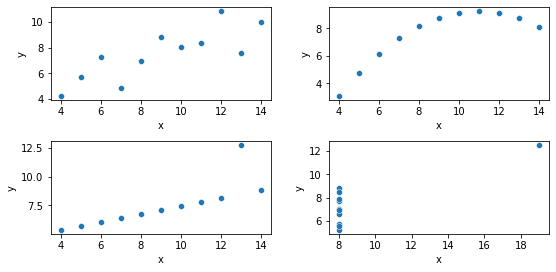

In [23]:
# initialize fig and axs
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8,4))

# add padding around each subplot so they are not squished together
fig.tight_layout(pad=2)

# plot by using the indexing method
sns.scatterplot(data=anscombe.loc[anscombe['dataset']=='I'], x='x', y='y', ax=axs[0][0])
sns.scatterplot(data=anscombe.loc[anscombe['dataset']=='II'], x='x', y='y', ax=axs[0][1])
sns.scatterplot(data=anscombe.loc[anscombe['dataset']=='III'], x='x', y='y', ax=axs[1][0])
sns.scatterplot(data=anscombe.loc[anscombe['dataset']=='IV'], x='x', y='y', ax=axs[1][1])

Plotting a portion of the same code above using the unpacking method would look like this :  
`fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10,5))`
`sns.scatterplot(anscombe.query('dataset=="I"'), x='x', y='y', ax=ax1)`

I do not like having to manually enter each `ax` variable and then having to keep track of which is which

One of the advantages of using `plt.subplots()` is the ease of customization, for example :

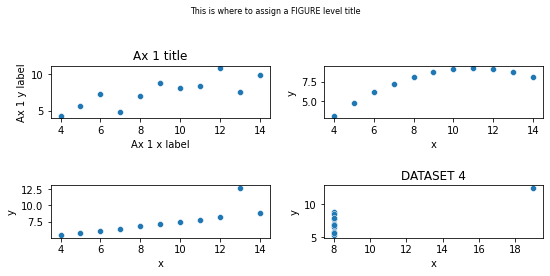

In [27]:
# using a figure method, add a figure level title
fig.suptitle('This is where to assign a FIGURE level title', fontsize=8)

fig.tight_layout(pad=2)

# using axes methods, add axes level titles and axis labels
axs[0][0].set(title='Ax 1 title', xlabel='Ax 1 x label', ylabel='Ax 1 y label')
axs[1][1].set(title='DATASET 4')
fig

Using `plt.subplots()`, easy to show multiple datasets in a single figure, which may be useful to see relationships between datasets, for example :

<AxesSubplot:xlabel='x', ylabel='y'>

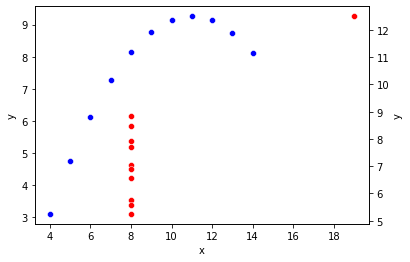

In [35]:
# initialize plot
fig, ax = plt.subplots()

# points in blue correspond to values on left y-axis
sns.scatterplot(data=anscombe.loc[anscombe['dataset']=='II'], x='x', y='y', color='blue')

# plot a new axes, but use the same exact x-axis as the ax variable
ax2 = ax.twinx()

# points in red correspond to values on the right y-axis
sns.scatterplot(data=anscombe.loc[anscombe['dataset']=='IV'], x='x', y='y', color='red')

Only the x-axis is shared by both datasets. Notice that y-axes on the left and right do not match up. I won't show it, but it is easy to plot both datasets using the same x and y-axis and color code the points to see differences

***
<a id='plot_side_by_side_sharing_an_axis'></a>
Another option is to plot data side-by-side, so they share the same y-axis (but depending on the x values, the axis scales may differ)

Useful for comparing differences, especially if shared axis is ordered (like years, to see the changes over time)

<AxesSubplot:xlabel='x', ylabel='y'>

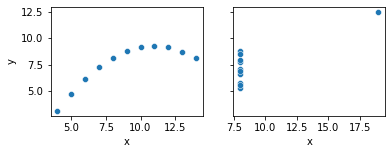

In [37]:
# arg sharey=True uses the same y-axis for all subplots
fig, axs = plt.subplots(1, 2, figsize=(6,2), sharey=True)

# plot datasets on respective axes
sns.scatterplot(data=anscombe.loc[anscombe['dataset']=='II'], x='x', y='y', ax=axs[0])
sns.scatterplot(data=anscombe.loc[anscombe['dataset']=='IV'], x='x', y='y', ax=axs[1])